In [1]:
import pyglet
from pyglet.window import mouse
from pyglet.window import key
import numpy as np
from Environment import Environment
from Agent import Agent
from time import time

In [2]:
s = [0.3, 0.3, 0.3] * 4
s

[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]

In [3]:
pyglet.canvas.get_display().get_default_screen()

Win32Screen(x=0, y=0, width=1920, height=1080)

In [4]:
env = Environment()
env.make(15)

agent = Agent(env.cell_nb)

score_Hist = []
ALoss_Hist = []
CLoss_Hist = []

num_episodes = 1000
num_actions = 100
for i in range(num_episodes):
    t0 = time()
    score = 0
    f_map = env.reset()
    episode_Hist = []
    eALoss = []
    eCLoss = []
    for k in range(num_actions):
        actions = agent.choose_action(f_map)
        episode = env.step(actions)
        #print(f"policy {actions} \npowers {[d.power for d in env.dList]}")
        #print(episode["r"])
        #env.render()
        actor_loss, critic_loss = agent.learn(episode)
        eALoss.append(actor_loss)
        eCLoss.append(critic_loss)
        score += episode["r"]
        episode_Hist.append(episode["r"])
    score_Hist.append(score)
    ALoss_Hist.append(np.mean(eALoss))
    CLoss_Hist.append(np.mean(eCLoss))

    print(f"episode {i} with score {score}, which took {np.round(time() - t0, 3)}s")
    #print(f"rewards {episode_Hist} average {np.mean(episode_Hist)}")


re 30803.371750410966, which took 3.3s
episode 670 with score 27820.913401844726, which took 3.175s
episode 671 with score 28919.0387073032, which took 3.302s
episode 672 with score 28463.77528561092, which took 3.319s
episode 673 with score 29858.517341127335, which took 2.898s
episode 674 with score 27441.741638473562, which took 3.271s
episode 675 with score 29142.817472081348, which took 3.291s
episode 676 with score 30215.59904782016, which took 3.282s
episode 677 with score 29930.035984743798, which took 3.148s
episode 678 with score 29698.7667694416, which took 3.261s
episode 679 with score 33561.703654613055, which took 3.301s
episode 680 with score 26719.73741957126, which took 3.274s
episode 681 with score 33186.678847487376, which took 3.265s
episode 682 with score 29876.001907761976, which took 2.813s
episode 683 with score 30389.803450680298, which took 2.145s
episode 684 with score 31264.40898126809, which took 2.492s
episode 685 with score 31232.772544422063, which took 

In [5]:
import matplotlib.pyplot as plt


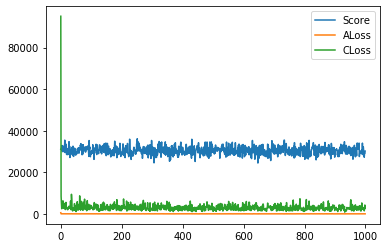

In [6]:
plt.plot(score_Hist)
plt.plot(ALoss_Hist)
plt.plot(CLoss_Hist)
plt.legend(["Score", "ALoss", "CLoss"])

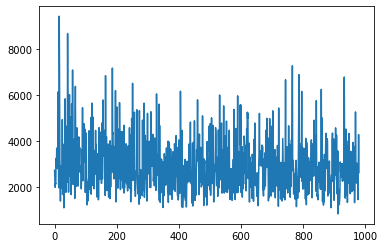

In [10]:
#plt.plot(ALoss_Hist[20:])
plt.plot(CLoss_Hist[20:])

In [8]:
[0.2, 0.6, 0.2] * 2 + [0.6, 0.2, 0.2]*2

[0.2, 0.6, 0.2, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.6, 0.2, 0.2]